In [1]:
import numpy as np
from numpy import pi,cos
import matplotlib.pyplot as plt
from scipy.signal import lfilter,freqz,lti,freqresp,tf2zpk
from zplane import zplane
%matplotlib inline

## 1- Calculate Impulse Respons h[n] analyticaly  using definition (formula)

In [27]:
def h(b,a,x):
    N = len(x)-1
    b = b / b[0]
    a = -a / a[0]
    y = np.zeros([N+1])
    y[0]= b[0]*x[0]
    for n in range(N):
        y[n+1] = a[1]*y[n] + b[0]*x[n+1]
    return y
def imp_plot(h):
    plt.stem(h, label="y[n]")
    plt.title("Impulse response of Diference equation",fontsize='14')
    plt.xlabel("n",fontsize='12')
    plt.ylabel("h[n]",fontsize='12')


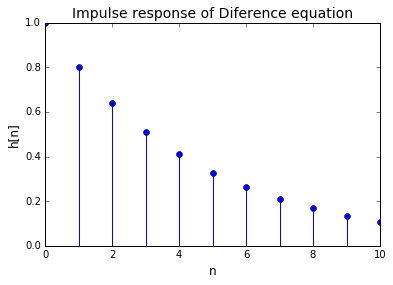

In [23]:
N = 10
x = np.zeros([N+1])
x[0] =1
# y[n] - 0.8 y[n-1] = x[n]
a = np.array([1 , -0.8]) 
b = np.array([1])
h1 = h(b,a,x)
imp_plot(h1)

## 2- Calculate Impulse Respons h[n] by using python library

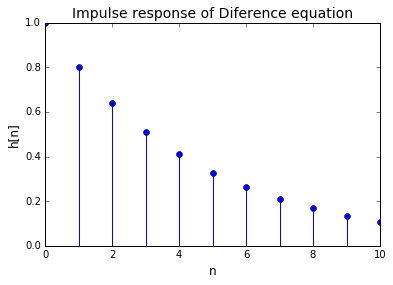

In [4]:
h2 = lfilter(b,a,x)
imp_plot(h2)

## 3- Comparison between analytical method and python_lib method

In [5]:
print("\tn","\th1","\t\th2")
print("\t---","\t---","\t\t---")
for i in range(len(h1)):
    print("\t",i,"\t",h1[i],"\t\t",h2[i])

	n 	h1 		h2
	--- 	--- 		---
	 0 	 1.0 		 1.0
	 1 	 0.8 		 0.8
	 2 	 0.64 		 0.64
	 3 	 0.512 		 0.512
	 4 	 0.4096 		 0.4096
	 5 	 0.32768 		 0.32768
	 6 	 0.262144 		 0.262144
	 7 	 0.2097152 		 0.2097152
	 8 	 0.16777216 		 0.16777216
	 9 	 0.134217728 		 0.134217728
	 10 	 0.1073741824 		 0.1073741824


## 4- Plotting frequency response for impulse response h[n]

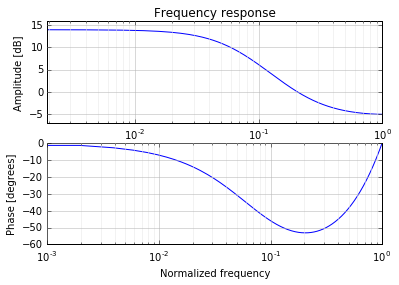

In [16]:
w,h = freqz(b,a)
# Frequency response
plt.subplot(2, 1, 1)
plt.plot(w/pi, 20*np.log10(abs(h.real)))
plt.xscale('log')
plt.title('Frequency response')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')

# Phase
plt.subplot(2, 1, 2)
plt.plot(w/pi, 180/pi * np.unwrap(np.angle(h)))
plt.xscale('log')
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True, color = '0.7', linestyle='-', which='major')
plt.grid(True, color = '0.9', linestyle='-', which='minor')

## Solve Ludiman Ex-1.7
![](https://lh6.googleusercontent.com/-wakm0BJGLGk/V0Qwc6YZ7gI/AAAAAAAAHdE/gtv84j_Seg0CITh6aTMBkIIRInPuEKzLgCLcB/w710-h311-no/ex1-7.PNG)

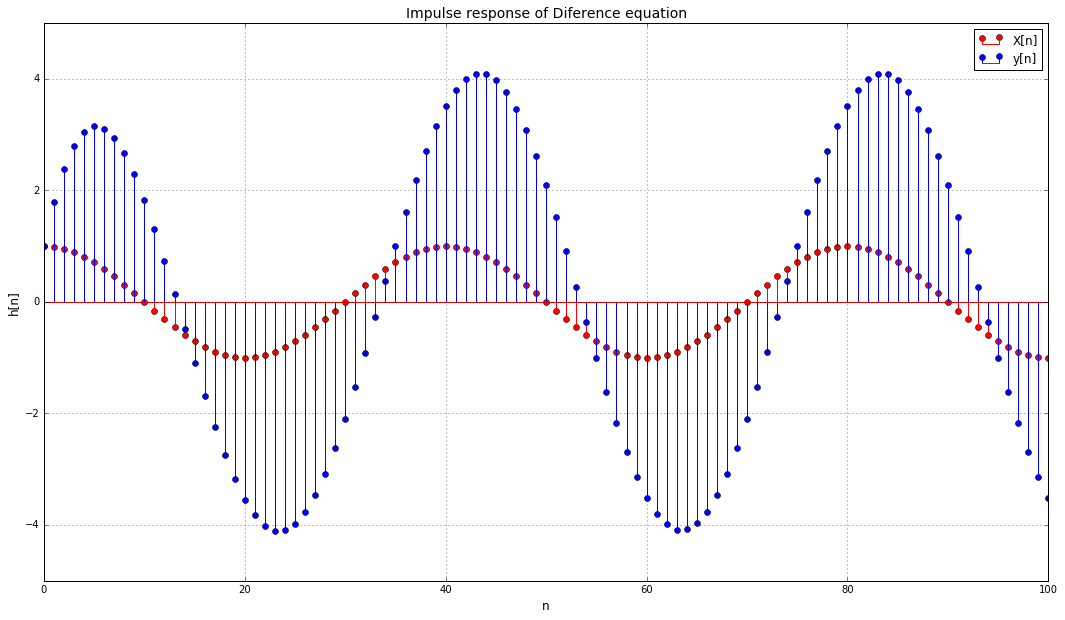

In [31]:
n = np.arange(101)
x = cos(0.05*pi*n)
plt.figure(figsize=(18,10))
plt.stem(n,x,'r',markerfmt='ro',label="X[n]")
h2 = lfilter(b,a,x)
imp_plot(h2)
plt.legend()
plt.grid()

# Many Thanks to Dr. Khaled
Developed by Hassan Badawy